In [1]:

'''
@Brief  User body size estimator(regressor) with kNN
@author Byunghun Hwang<bh.hwang@iae.re.kr>
@Date   2020.12.17
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor


In [2]:
# load standard size dataset
raw_dataset = pd.read_csv('./data_size/raw_size.csv', header=0, index_col=False)
dataset = raw_dataset[["gender", "age", "N3", "N31", "N16"]] # N3:height, N31:weight, N16:Knee Height
dataset = dataset.sample(frac=1) # shuffle
print("* Raw dataset size : ", len(dataset))

#Drop NaN
dataset = dataset.loc[dataset["N3"].notna() & dataset["N31"].notna() & dataset["N16"].notna()] #extract not NaN
print("* Dataset(without NaN) : ", len(dataset))
print(dataset)


* Raw dataset size :  6420
* Dataset(without NaN) :  6412
      gender  age      N3   N31    N16
4278       1   17  1653.0  50.0  400.0
1586       0   34  1640.0  60.0  433.0
5388       0   18  1617.0  61.0  392.0
3210       1   44  1657.0  60.0  430.0
3874       1   23  1754.0  92.0  446.0
...      ...  ...     ...   ...    ...
4849       1   19  1706.0  75.0  477.0
3698       1   42  1789.0  77.0  428.0
1410       0   33  1666.0  54.0  441.0
3172       1   26  1861.0  82.0  493.0
4208       1   38  1813.0  88.0  467.0

[6412 rows x 5 columns]


In [3]:

#split dataset for cross validation
trainset, testset = train_test_split(dataset, test_size = 0.2)
x_train = trainset[["N3"]]
y_train = trainset[["N16"]]
x_test = testset[["N3"]]
y_test = testset[["N16"]]

print(x_train, y_train)
print(x_test, y_test)


          N3
833   1825.0
6379  1591.0
2085  1609.0
204   1750.0
2418  1582.0
...      ...
613   1650.0
211   1610.0
2742  1776.0
5430  1595.0
2090  1614.0

[5129 rows x 1 columns]         N16
833   488.0
6379  399.0
2085  415.0
204   467.0
2418  408.0
...     ...
613   433.0
211   441.0
2742  476.0
5430  389.0
2090  443.0

[5129 rows x 1 columns]
          N3
2108  1684.0
1764  1562.0
3402  1700.0
838   1681.0
4637  1646.0
...      ...
5395  1535.0
5004  1550.0
429   1437.0
2125  1676.0
5490  1496.0

[1283 rows x 1 columns]         N16
2108  455.0
1764  400.0
3402  455.0
838   442.0
4637  416.0
...     ...
5395  394.0
5004  388.0
429   383.0
2125  432.0
5490  388.0

[1283 rows x 1 columns]


Running for  1
Running for  2
Running for  3
Running for  4
Running for  5
Running for  6
Running for  7
Running for  8
Running for  9
Running for  10
Running for  11
Running for  12
Running for  13
Running for  14
Running for  15
Running for  16
Running for  17
Running for  18
Running for  19
Running for  20
Running for  21
Running for  22
Running for  23
Running for  24
Running for  25
Running for  26
Running for  27
Running for  28
Running for  29
Test Scores : [0.5003153279677898, 0.6028456291369029, 0.6458104483535764, 0.6676897599013569, 0.6833642842354071, 0.692975957984288, 0.6991228037524961, 0.7077519013181574, 0.7104533406681511, 0.7150690649009085, 0.7154096669734091, 0.7187892330461303, 0.7203527288893476, 0.7223412662374284, 0.7228463606315081, 0.7234925469548448, 0.724334602356057, 0.7256119153629856, 0.725798132967704, 0.7261277735746863, 0.7260117991139703, 0.7266486898149809, 0.7261939627592751, 0.7263939687797933, 0.7266358897846437, 0.727067022441258, 0.727052481888

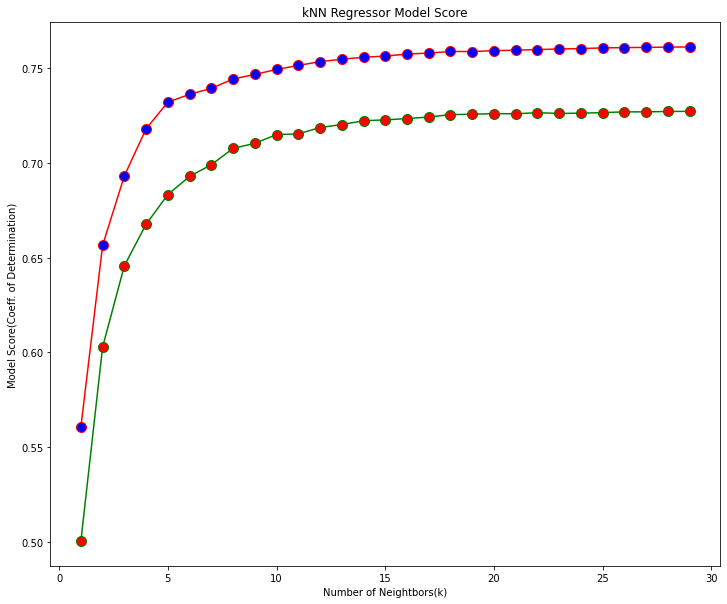

In [4]:


train_score = []
test_score = []

plt.figure(figsize=(12,10))
plt.title("kNN Regressor Model Score")
for i in range(1, 30):
    model = KNeighborsRegressor(n_neighbors=i, weights="distance", metric="minkowski", metric_params={"p":4})
    model.fit(x_train, y_train)

    train_score.append(model.score(x_train, y_train))
    test_score.append(model.score(x_test, y_test))
    print("Running for ", i)



plt.plot(range(1,30), train_score, color="red", linestyle="solid", marker="o", markerfacecolor="blue", markersize=10)
plt.plot(range(1,30), test_score, color="green", linestyle="solid", marker="o", markerfacecolor="red", markersize=10)
plt.xlabel("Number of Neightbors(k)")
plt.ylabel("Model Score(Coeff. of Determination)")
plt.plot()

print("Test Scores :", test_score)


In [5]:

# test data
data_in = pd.DataFrame(np.array([[1, 42, 1807, 72.4]]), columns=['gender', 'age', 'N3', 'N31'])

model = KNeighborsRegressor(n_neighbors=25, weights="distance", metric="minkowski", metric_params={"p":2}) # selected model
model.fit(x_train, y_train)
predicted = model.predict(data_in)
print(predicted)

ValueError: query data dimension must match training data dimension